# **Task 2:**

Customer Segmentation Using Unsupervised Learning
Objective:
Cluster customers based on spending habits and propose marketing strategies tailored to each
segment.
Dataset:
Mall Customers Dataset
Instructions:
● Conduct Exploratory Data Analysis (EDA)
● Apply K-Means Clustering to segment customers
● Use PCA or t-SNE to visualize the clusters
● Suggest relevant marketing strategies for each identified segment
Skills Gained:
● Unsupervised learning (K-Means)
● Dimensionality reduction (PCA, t-SNE)
● Customer segmentation
● Strategy development based on data insights


# Loading datset

The Mall Customers Dataset provides data on 200 individuals who visit a mall, including demographic information, annual income, and spending habits. This dataset is useful for exploratory data analysis, customer segmentation, and clustering tasks (e.g., K-means clustering).

Dataset Summary

Rows: 200
Columns: 5
No missing values
Columns Description

CustomerID: A unique identifier for each customer (integer).
Genre: The gender of the customer (Male/Female).
Age: The age of the customer (integer).
Annual Income (k$): Annual income of the customer in thousands of dollars (integer).
Spending Score (1-100): A score assigned by the mall based on customer behavior and spending patterns (integer).
Potential Use Cases

Customer Segmentation: Group customers based on their income and spending habits.
Behavioral Analysis: Explore how factors like gender, age, and income influence spending scores.
Clustering: Apply algorithms such as K-means to identify clusters of customers with similar characteristics.
Targeted Marketing Campaigns: Use the insights to create personalized promotions for different customer segments.
Exploratory Questions

What is the relationship between annual income and spending score?
Does gender or age influence spending behavior?
Which customers have high spending scores but low incomes, or vice versa?
Suggested Analysis Techniques

EDA: Visualize income distribution, age groups, and spending patterns.
Clustering Algorithms: Use K-means or hierarchical clustering for segmentation.
Correlation Analysis: Investigate correlations between age, income, and spending score.
Licensing & Citation

License: Open for public use, suitable for educational and research purposes.
Citation: If you use this dataset in your project or research, please reference this dataset appropriately.

In [ ]:
# Install if not installed
# pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

# IMPORTANT: file inside the dataset
file_path = "Mall_Customers.csv"

# Load dataset into pandas DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "abdallahwagih/mall-customers-segmentation",
    file_path
)

print(df.head())


/tmp/ipython-input-951951290.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'mall-customers-segmentation' dataset.
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# EDA And Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df3=df

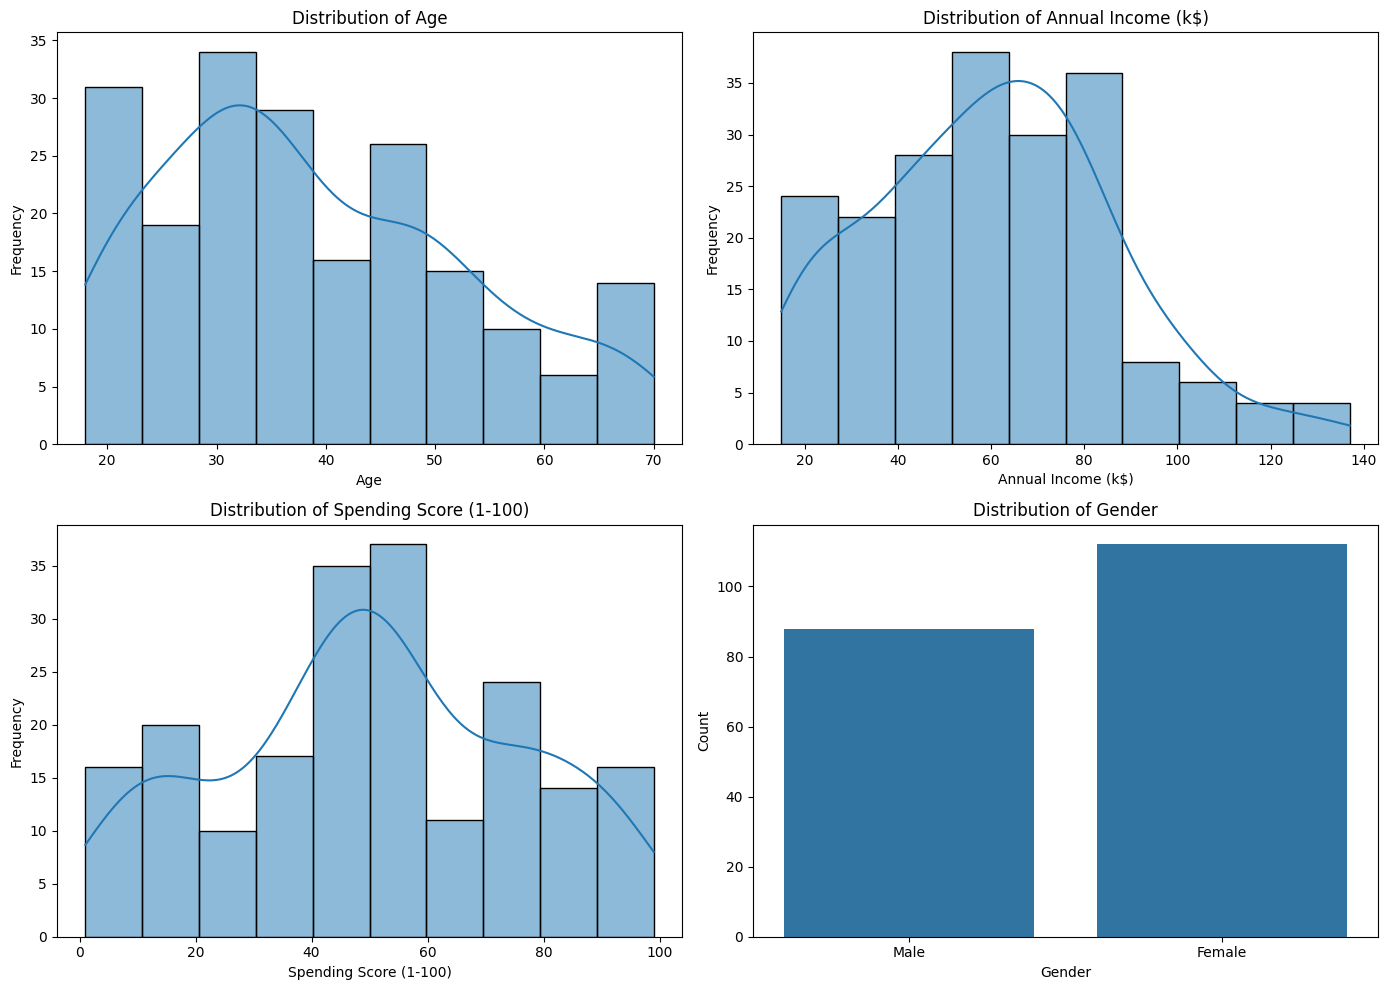

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10)) # Adjusted to 2x2 for 3 numerical + 1 categorical plot
axes = axes.flatten() # Flatten the 2x2 array of axes for easier iteration

# List of numerical columns to plot histograms for (Mall Customers Dataset)
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Create histograms for numerical features
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i], bins=10) # Using bins=10 for better visualization of age/scores
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Create a countplot for the 'Genre' categorical feature (Mall Customers Dataset)
sns.countplot(x='Genre', data=df, ax=axes[3]) # Now at index 3 for the 4th plot
axes[3].set_title('Distribution of Gender') # Renaming title as 'Genre' represents gender
axes[3].set_xlabel('Gender')
axes[3].set_ylabel('Count')

# Hide any unused subplots (if any, though none expected with 2x2 for 4 plots)
for i in range(len(numerical_cols) + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Feature Selection for Clustering



In [ ]:
# For this particular task, which focuses on
#  segmenting customers based on their spending habits, 'Annual Income (k$)' and 'Spending Score (1-100)' are the most direct and relevant features. Including 'Age' would definitely give us a different segmentation, perhaps revealing age-based patterns, but it might dilute the focus on pure spending behavior.
X = df3[['Annual Income (k$)', 'Spending Score (1-100)']]

print("First 5 rows of the selected features (X):")
print(X.head())

First 5 rows of the selected features (X):
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


# Model Training And Evaluation

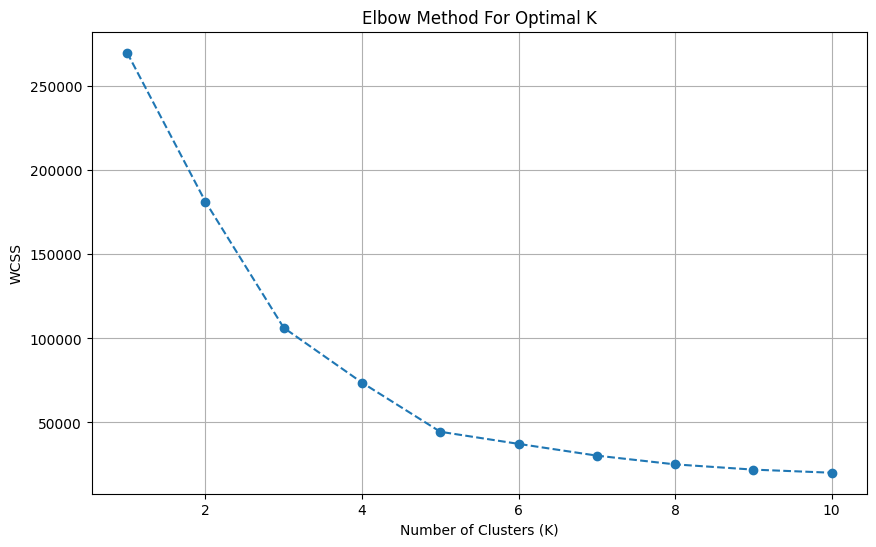

WCSS values calculated for K from 1 to 10: [269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30241.34361793659, 25036.417604033977, 21916.79478984372, 20072.070939404]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

print("WCSS values calculated for K from 1 to 10:", wcss)

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("Cluster labels generated by K-Means (first 10):")
print(y_kmeans[:10])
print("Number of samples per cluster:")
import collections
print(collections.Counter(y_kmeans))

Cluster labels generated by K-Means (first 10):
[4 2 4 2 4 2 4 2 4 2]
Number of samples per cluster:
Counter({np.int32(0): 81, np.int32(1): 39, np.int32(3): 35, np.int32(4): 23, np.int32(2): 22})


**Reasoning**:
Now that K-Means clustering has been applied and cluster labels generated, I will visualize these clusters using the original features. This will provide a clear understanding of how customers are segmented based on their annual income and spending score, fulfilling the visualization requirement of the task.



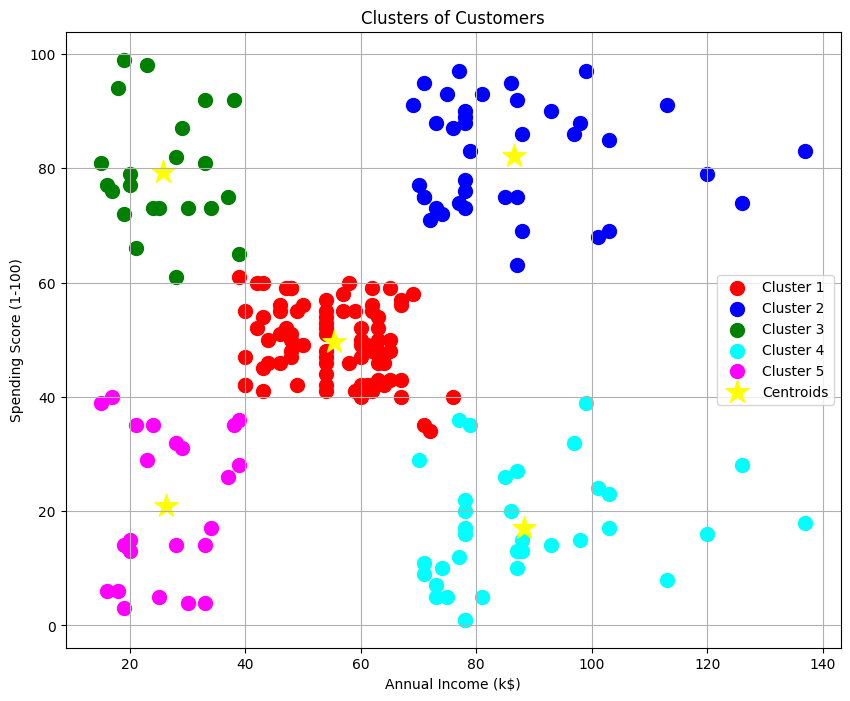

In [ ]:
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids', marker='*')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

Based on the K-Means clustering visualization of customers by 'Annual Income (k$)' and 'Spending Score (1-100)', five distinct customer segments have been identified. Here are the insights for each:

Characterize Cluster 1 (Red): Describe Cluster 1 (red) as customers with low annual income and low spending scores. These could be new customers or budget-conscious shoppers.


Characterize Cluster 2 (Blue): Describe Cluster 2 (blue) as customers with high annual income and high spending scores. These are likely the most valuable, 'premium' customers.


Characterize Cluster 3 (Green): Describe Cluster 3 (green) as customers with low annual income but high spending scores. These might be impulsive buyers or deal-seekers.


Characterize Cluster 4 (Cyan): Describe Cluster 4 (cyan) as customers with high annual income but low spending scores. These customers have high potential but are currently disengaged.


Characterize Cluster 5 (Magenta): Describe Cluster 5 (magenta) as customers with moderate annual income and moderate spending scores. This is often a stable, average customer base.



Propose Marketing Strategies for each Cluster: Based on the insights for each cluster, propose tailored marketing strategies to effectively target and engage each group. This includes focusing on value, premium offers, retention, or re-engagement depending on the segment.

**Reasoning**:
As instructed, I will first add the `y_kmeans` cluster labels as a new column named 'Cluster' to the original DataFrame `df`. Then, I will group the DataFrame by this new 'Cluster' column and calculate the mean values for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for each cluster. Finally, I will print the resulting aggregated DataFrame to display the characteristics of each segment.



In [ ]:
df['Cluster'] = y_kmeans

cluster_characteristics = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

print("Cluster Characteristics (Mean values):")
print(cluster_characteristics)

Cluster Characteristics (Mean values):
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043


# Conlusion /Report

## Summary:

### Data Analysis Key Findings

*   **Initial Data Overview**: The dataset consists of 200 customer entries across 5 columns: `CustomerID`, `Gender`, `Age`, `Annual Income (k\$)`, and `Spending Score (1-100)`. There were no missing values in the dataset.
*   **Descriptive Statistics**:
    *   The average age of customers is approximately 38.8 years, ranging from 18 to 70.
    *   Annual income ranges from \$15k to \$137k, with an average of about \$60.6k.
    *   Spending scores (on a scale of 1-100) average around 50.2, spanning from 1 to 99.
*   **Optimal Number of Clusters**: The Elbow Method, which analyzes the Within-Cluster Sum of Squares (WCSS), indicated that 5 is the optimal number of clusters for segmenting the customers based on their annual income and spending score.
*   **Customer Segmentation Results**: K-Means clustering successfully identified 5 distinct customer segments:
    *   **Cluster 0 (Moderate Income, Moderate Spending)**: This cluster represents customers with an average age of 42.7 years, an average annual income of \$55.3k, and an average spending score of 49.5.
    *   **Cluster 1 (High Income, High Spending)**: Comprising younger customers (average age 32.7 years), this segment has a high average annual income of \$86.5k and a very high average spending score of 82.1.
    *   **Cluster 2 (Low Income, High Spending)**: The youngest group (average age 25.3 years), these customers have a low average annual income of \$25.7k but a remarkably high average spending score of 79.4.
    *   **Cluster 3 (High Income, Low Spending)**: An older segment (average age 41.1 years) characterized by high average annual income (\$88.2k) but very low average spending scores (17.1).
    *   **Cluster 4 (Low Income, Low Spending)**: This is the oldest group (average age 45.2 years) with low average annual income (\$26.3k) and low average spending scores (20.9).

### Insights or Next Steps

*   **Tailored Marketing Strategies**: Implement the proposed marketing strategies for each of the five identified customer segments. For example, focus on exclusive offers for "High Income, High Spending" customers (Cluster 1) and value-for-money deals for "Low Income, Low Spending" customers (Cluster 4).
*   **Further Analysis**: Investigate the "Low Income, High Spending" segment (Cluster 2) further to understand the underlying motivations for their high spending despite lower income. This could involve exploring external factors, seasonal purchases, or specific product interests to refine marketing for this group.


## Apply PCA and t-SNE for Cluster Visualization


Apply Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) to the selected features to prepare for cluster visualization. Even with two features, this demonstrates the application of these techniques for transforming data for visualization purposes.


**Reasoning**:
As instructed, I will import `PCA` and `TSNE`, then apply PCA and t-SNE to the `X` DataFrame, initializing both with `n_components=2`. For t-SNE, I will also set `random_state=42` and `perplexity=30`. Finally, I will print the shapes of the transformed data to verify the dimensionality reduction.



In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# IMPORTANT: file inside the dataset
file_path = "Mall_Customers.csv"

# Load dataset into pandas DataFrame, re-ensuring df is defined
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "abdallahwagih/mall-customers-segmentation",
    file_path
)

# Redefine X with the loaded df
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

print(f"Shape of X_pca: {X_pca.shape}")
print(f"Shape of X_tsne: {X_tsne.shape}")

/tmp/ipython-input-1852857445.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'mall-customers-segmentation' dataset.
Shape of X_pca: (200, 2)
Shape of X_tsne: (200, 2)


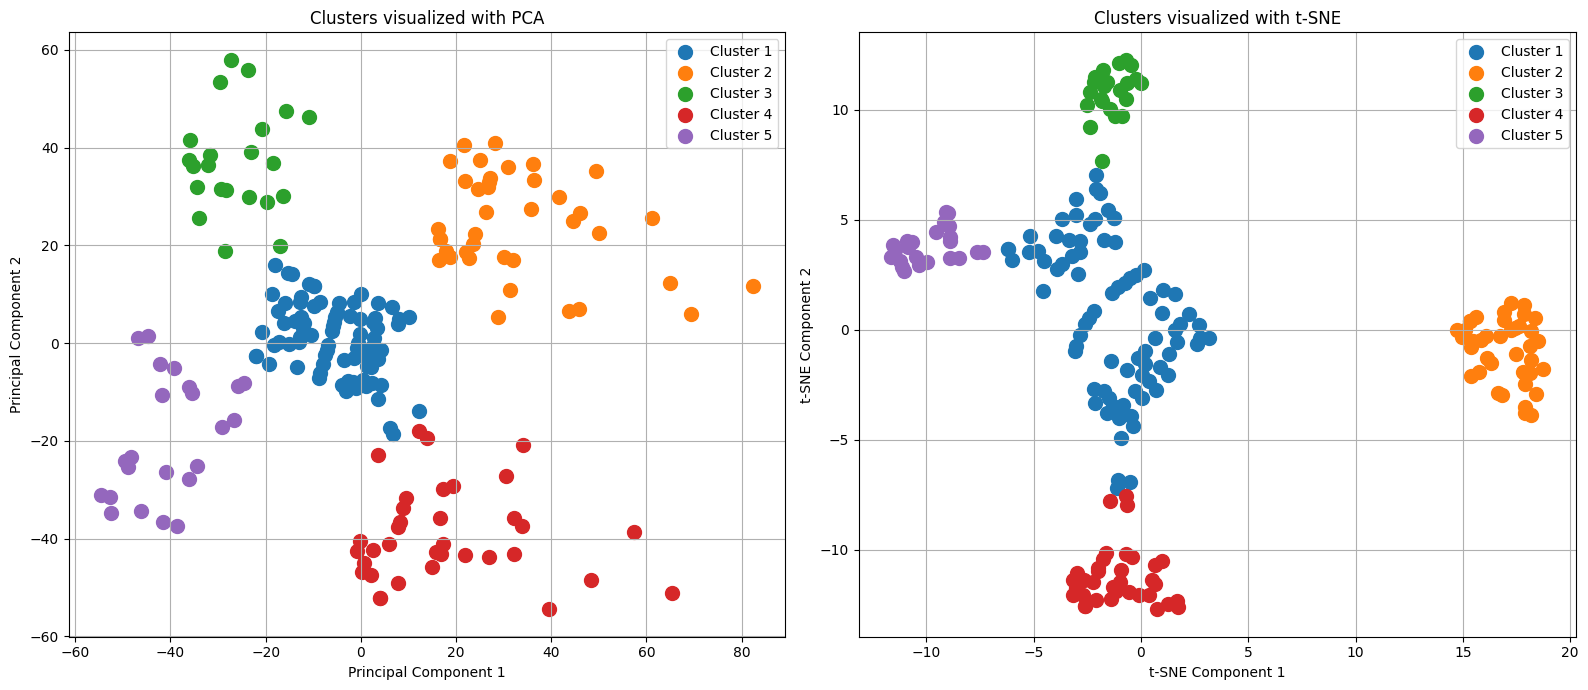

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 7))

# Plot PCA results
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
for i in range(5):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1], s = 100, label = f'Cluster {i+1}')
plt.title('Clusters visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Plot t-SNE results
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
for i in range(5):
    plt.scatter(X_tsne[y_kmeans == i, 0], X_tsne[y_kmeans == i, 1], s = 100, label = f'Cluster {i+1}')
plt.title('Clusters visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Task 3:**

In [ ]:
Energy Consumption Time Series Forecasting
Objective:
Forecast short-term household energy usage using historical time-based patterns.
Dataset:
Household Power Consumption Dataset
Instructions:
● Parse and resample the time series data
● Engineer time-based features (e.g., hour of day, weekday/weekend)
● Compare performance of ARIMA, Prophet, and XGBoost models
● Plot actual vs. forecasted energy usage for visualization
Skills Gained:
● Time series forecasting
● Feature engineering
● Model comparison and evaluation (MAE, RMSE)
● Temporal data visualization

# **Problem Statement**

# EDA And Feature Engineering

Context: Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.

Data Set Characteristics:
Multivariate, Time-Series

Associated Tasks:
Regression, Clustering

Data Set Information:

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).
Notes:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

Attribute Information:
1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.




In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
Xt2 = individual_household_electric_power_consumption.data.features
yt2 = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)


/usr/local/lib/python3.12/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [4]:
print(individual_household_electric_power_consumption.has_missing_values)


None


In [5]:
print(individual_household_electric_power_consumption.data_url)

None


In [6]:
# Features dataframe
print("Features (X) head:")
print(Xt2.head())

# There is no target dataframe for this dataset (yt2 is None).
# print("\nTarget (y) head:")
# print(yt2.head())

Features (X) head:
         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [ ]:
Xt2.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
Xt2['Date'].dtypes

dtype('O')

In [ ]:
Xt2.dtypes

,0
Date,datetime64[ns]
Time,object
Global_active_power,object
Global_reactive_power,object
Voltage,object
Global_intensity,object
Sub_metering_1,object
Sub_metering_2,object
Sub_metering_3,float64


In [7]:
import pandas as pd


In [8]:
Xt2['Date']=pd.to_datetime(Xt2['Date'])

/tmp/ipython-input-1437727680.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Xt2['Date']=pd.to_datetime(Xt2['Date'])


In [ ]:
Xt2.describe()

,Date,Sub_metering_3
count,2075259,2.049280e+06
mean,2008-12-05 19:13:27.255191040,6.458447e+00
min,2006-12-16 00:00:00,0.000000e+00
25%,2007-12-12 00:00:00,0.000000e+00
50%,2008-12-06 00:00:00,1.000000e+00
75%,2009-12-01 00:00:00,1.700000e+01
max,2010-11-26 00:00:00,3.100000e+01
std,NaN,8.437154e+00


In [ ]:
Xt2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 142.5+ MB


In [9]:
Xt2.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [ ]:
# df.drop(105,axis=0,inplace=True)

In [10]:
df_e=Xt2[['Date','Time','Global_active_power']]

In [11]:
df_e.shape

(2075259, 3)

In [12]:

print(df_e['Global_active_power'].isna().sum())



0


In [14]:
# The 'Global_active_power' column is currently of object type. To perform numerical operations,
# it needs to be converted to a numeric type (e.g., float). We'll use pd.to_numeric with
# errors='coerce' to convert any non-numeric values (like '?') to NaN.
df_e['Global_active_power'] = pd.to_numeric(df_e['Global_active_power'], errors='coerce')

# Now, let's check the dtype again to confirm the change
print(df_e['Global_active_power'].dtypes)

# Also, print the sum of null values to see how many non-numeric entries were coerced
print('Number of NaN values after conversion:', df_e['Global_active_power'].isnull().sum())

float64
Number of NaN values after conversion: 25979


/tmp/ipython-input-2099497646.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_e['Global_active_power'] = pd.to_numeric(df_e['Global_active_power'], errors='coerce')


In [13]:
import pandas as pd

In [15]:

datetime_series = pd.to_datetime(Xt2['Date'].astype(str) + ' ' + Xt2['Time'].astype(str))

df_e = pd.DataFrame({
    'Global_active_power': pd.to_numeric(Xt2['Global_active_power'], errors='coerce'),
    'DateTime': datetime_series
})

# Set the new 'DateTime' column as the DataFrame index
df_e.set_index('DateTime', inplace=True)

# Fill NaN values in 'Global_active_power' using forward fill (ffill) suitable for time series
df_e.loc[:, 'Global_active_power'] = df_e['Global_active_power'].ffill()

# Check for any remaining NaN values in the relevant column
print("Number of NaN values after interpolation:", df_e['Global_active_power'].isnull().sum())
print("df_e head after processing:\n", df_e.head())
print("df_e info after processing:\n")
df_e.info()

Number of NaN values after interpolation: 0
df_e head after processing:
                      Global_active_power
DateTime                                
2006-12-16 17:24:00                4.216
2006-12-16 17:25:00                5.360
2006-12-16 17:26:00                5.374
2006-12-16 17:27:00                5.388
2006-12-16 17:28:00                3.666
df_e info after processing:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 1 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Global_active_power  float64
dtypes: float64(1)
memory usage: 31.7 MB


<Axes: xlabel='DateTime'>

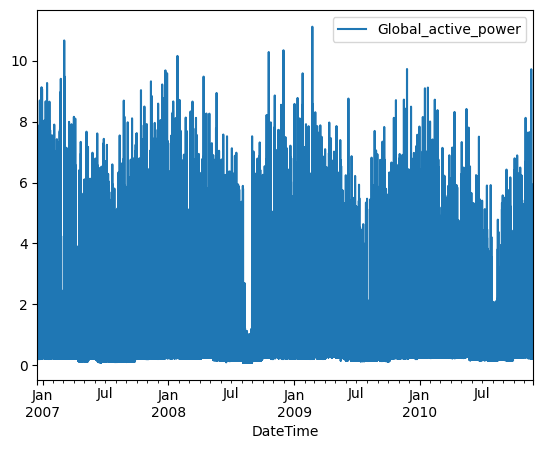

In [16]:
df_e.plot()

In [ ]:
# to check data is seasonal or not perform adfuller test

In [17]:
from statsmodels.tsa.stattools import adfuller

In [2]:
#H1: it is stationary
#H0: it is non stationary

def adfuller_test(power):
  result=adfuller(power)
  labels=['ADF test statistic','p-value','#lags used','number of observations used']
  for val ,label in zip(result,labels):
    print(label+' : '+str(val))
  if result[1]<=0.05:
    print(" strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  else:
    print("weak evidence against null hypothesis ,time series has aunit root ,indicating it is non stationary")

In [3]:
adfuller_test(df_e['Global_active_power'])

NameError: name 'df_e' is not defined

## Correct Column Selection




Resample the time series data (`df_e`) to an hourly frequency, aggregating `Global_active_power` by taking the mean, and store the result in a new DataFrame called `hourly_df`.

## Resample Time Series Data


Resample the time series data to a lower frequency (e.g., hourly or daily, aggregating `Global_active_power` by taking the mean or sum) to manage computational load and focus on relevant patterns for short-term forecasting.


In [ ]:
hourly_df = df_e['Global_active_power'].resample('H').mean()

print("First 5 rows of hourly_df:")
print(hourly_df.head())
print("\nInformation about hourly_df:")
hourly_df.info()

First 5 rows of hourly_df:
DateTime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
Freq: h, Name: Global_active_power, dtype: float64

Information about hourly_df:
<class 'pandas.core.series.Series'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: h
Series name: Global_active_power
Non-Null Count  Dtype  
--------------  -----  
34589 non-null  float64
dtypes: float64(1)
memory usage: 540.5 KB


/tmp/ipython-input-3054122388.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_df = df_e['Global_active_power'].resample('H').mean()


In [ ]:
hourly_df = df_e['Global_active_power'].resample('h').mean()

print("First 5 rows of hourly_df:")
print(hourly_df.head())
print("\nInformation about hourly_df:")
hourly_df.info()

First 5 rows of hourly_df:
DateTime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
Freq: h, Name: Global_active_power, dtype: float64

Information about hourly_df:
<class 'pandas.core.series.Series'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Freq: h
Series name: Global_active_power
Non-Null Count  Dtype  
--------------  -----  
34589 non-null  float64
dtypes: float64(1)
memory usage: 540.5 KB


## Engineer Time-Based Features


Extract various time-based features from the resampled datetime index, such as hour of day, day of week, day of year, month, and year. Also, create a 'weekday/weekend' indicator.



As instructed, I will create a new DataFrame `features_df` from `hourly_df`, extract various time-based features (hour, day of week, day of year, month, year), and create a 'weekday/weekend' indicator. Finally, I will print the head and info of the `features_df` to display and verify the newly engineered features.



In [ ]:
import pandas as pd

# 1. Create a new DataFrame `features_df` from `hourly_df`
features_df = hourly_df.to_frame(name='Global_active_power')

# 2. Extract the 'hour' from the DateTime index
features_df['hour'] = features_df.index.hour

# 3. Extract the 'day of the week' (Monday=0, Sunday=6)
features_df['dayofweek'] = features_df.index.dayofweek

# 4. Extract the 'day of the year'
features_df['dayofyear'] = features_df.index.dayofyear

# 5. Extract the 'month'
features_df['month'] = features_df.index.month

# 6. Extract the 'year'
features_df['year'] = features_df.index.year

# 7. Create a 'weekday/weekend' indicator
features_df['weekday'] = (features_df['dayofweek'] < 5).astype(int)

# 8. Print the head of the `features_df`
print("First 5 rows of features_df with engineered features:")
print(features_df.head())

# 9. Print the info of `features_df`
print("\nInformation about features_df:")
features_df.info()

First 5 rows of features_df with engineered features:
                     Global_active_power  hour  dayofweek  dayofyear  month  \
DateTime                                                                      
2006-12-16 17:00:00             4.222889    17          5        350     12   
2006-12-16 18:00:00             3.632200    18          5        350     12   
2006-12-16 19:00:00             3.400233    19          5        350     12   
2006-12-16 20:00:00             3.268567    20          5        350     12   
2006-12-16 21:00:00             3.056467    21          5        350     12   

                     year  weekday  
DateTime                            
2006-12-16 17:00:00  2006        0  
2006-12-16 18:00:00  2006        0  
2006-12-16 19:00:00  2006        0  
2006-12-16 20:00:00  2006        0  
2006-12-16 21:00:00  2006        0  

Information about features_df:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26

## Prepare Data for Forecasting Models


Split the data into training and testing sets, and prepare the target variable (resampled `Global_active_power`) and engineered features for use with ARIMA, Prophet, and XGBoost models.



As instructed, I will split the `features_df` into training and testing sets based on an 80/20 ratio, separate the target variable ('Global_active_power') from the features for both sets, and prepare a specific DataFrame for the Prophet model with 'ds' and 'y' columns. Finally, I will display the shapes of the resulting datasets and the head of the Prophet training DataFrame to verify the data preparation.



# **ARMINA Model**

In [ ]:
import numpy as np

# 1. Split the data into training and testing sets (80% train, 20% test)
split_point = int(len(features_df) * 0.8)
train_df = features_df.iloc[:split_point]
test_df = features_df.iloc[split_point:]

# 2. Separate the target variable ('Global_active_power') and features
X_train = train_df.drop('Global_active_power', axis=1)
y_train = train_df['Global_active_power']

X_test = test_df.drop('Global_active_power', axis=1)
y_test = test_df['Global_active_power']

# 3. For the Prophet model, create a new training DataFrame
prophet_train_df = pd.DataFrame({
    'ds': y_train.index,
    'y': y_train.values
})

# 4. Display the shapes and head to verify
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("\nHead of prophet_train_df:")
print(prophet_train_df.head())

Shape of X_train: (27671, 6)
Shape of y_train: (27671,)
Shape of X_test: (6918, 6)
Shape of y_test: (6918,)

Head of prophet_train_df:
                   ds         y
0 2006-12-16 17:00:00  4.222889
1 2006-12-16 18:00:00  3.632200
2 2006-12-16 19:00:00  3.400233
3 2006-12-16 20:00:00  3.268567
4 2006-12-16 21:00:00  3.056467


## Train and Evaluate ARIMA Model


Implement and train an ARIMA model on the prepared time series data. Then, forecast future energy usage and evaluate its performance using metrics like MAE and RMSE.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Instantiate an ARIMA model with order (5,1,0)
# Set enforce_stationarity=False and enforce_invertibility=False as specified
arima_model = ARIMA(y_train, order=(5,1,0), enforce_stationarity=False, enforce_invertibility=False)

# Fit the ARIMA model to the training data
arima_results = arima_model.fit()

# Make predictions on the test set
# The predict method takes start and end indices for forecasting
start_index = len(y_train)
end_index = len(y_train) + len(y_test) - 1
arima_predictions = arima_results.predict(start=start_index, end=end_index)

# Calculate Mean Absolute Error (MAE)
mae_arima = mean_absolute_error(y_test, arima_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_arima = np.sqrt(mean_squared_error(y_test, arima_predictions))

# Print the results
print(f"ARIMA MAE: {mae_arima:.2f}")
print(f"ARIMA RMSE: {rmse_arima:.2f}")

ARIMA MAE: 0.58
ARIMA RMSE: 0.81


# **PROPHET Model**

## Train and Evaluate Prophet Model


Ensure the `prophet` library is correctly installed and accessible. Prepare the data in the format required by Prophet ('ds' for datetime, 'y' for target), train the model, forecast energy usage, and evaluate its performance.


# **XGBOOST Model**

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Instantiate a Prophet model
# You can include parameters like seasonality_mode='additive' for better fitting.
prophet_model = Prophet(seasonality_mode='additive')

# 2. Fit the Prophet model to the prophet_train_df DataFrame
prophet_model.fit(prophet_train_df)

# 3. Create a future DataFrame for predictions
# Ensure it extends for the length of your y_test period at an hourly frequency.
future = prophet_model.make_future_dataframe(periods=len(y_test), freq='h')

# 4. Generate predictions on this future DataFrame
prophet_predictions_df = prophet_model.predict(future)

# 5. Extract the forecasted values (yhat) from the predictions for the test period.
# Align predictions with the y_test index for accurate evaluation
prophet_predictions = prophet_predictions_df['yhat'].tail(len(y_test))

# Calculate Mean Absolute Error (MAE)
mae_prophet = mean_absolute_error(y_test, prophet_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_prophet = np.sqrt(mean_squared_error(y_test, prophet_predictions))

# Print the calculated MAE and RMSE for the Prophet model.
print(f"Prophet MAE: {mae_prophet:.2f}")
print(f"Prophet RMSE: {rmse_prophet:.2f}")

Prophet MAE: 0.49
Prophet RMSE: 0.65


## Train and Evaluate XGBoost Model



In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Instantiate an XGBRegressor model with a random_state for reproducibility
xgb_model = XGBRegressor(random_state=42)

# Fit the XGBRegressor model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, xgb_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))

# Print the calculated MAE and RMSE for the XGBoost model
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

XGBoost MAE: 0.48
XGBoost RMSE: 0.66


## Compare Model Performance


Compare the forecasting accuracy of ARIMA, Prophet, and XGBoost models using common time series evaluation metrics (e.g., MAE, RMSE) on the test set.


In [ ]:
import pandas as pd

# Create a dictionary to hold the metrics
metrics_data = {
    'Model': ['ARIMA', 'Prophet', 'XGBoost'],
    'MAE': [mae_arima, mae_prophet, mae_xgb],
    'RMSE': [rmse_arima, rmse_prophet, rmse_xgb]
}

# Create a DataFrame from the metrics data
performance_df = pd.DataFrame(metrics_data)

# Set 'Model' as the index for better readability
performance_df.set_index('Model', inplace=True)

# Print the DataFrame to display the comparison
print("Model Performance Comparison (MAE and RMSE):")
print(performance_df)

Model Performance Comparison (MAE and RMSE):
              MAE      RMSE
Model                      
ARIMA    0.584634  0.807134
Prophet  0.493913  0.646140
XGBoost  0.478398  0.664820


## Visualize Forecasts


Plot the actual energy usage against the forecasted values from each model for a clear visual comparison of their predictive capabilities.


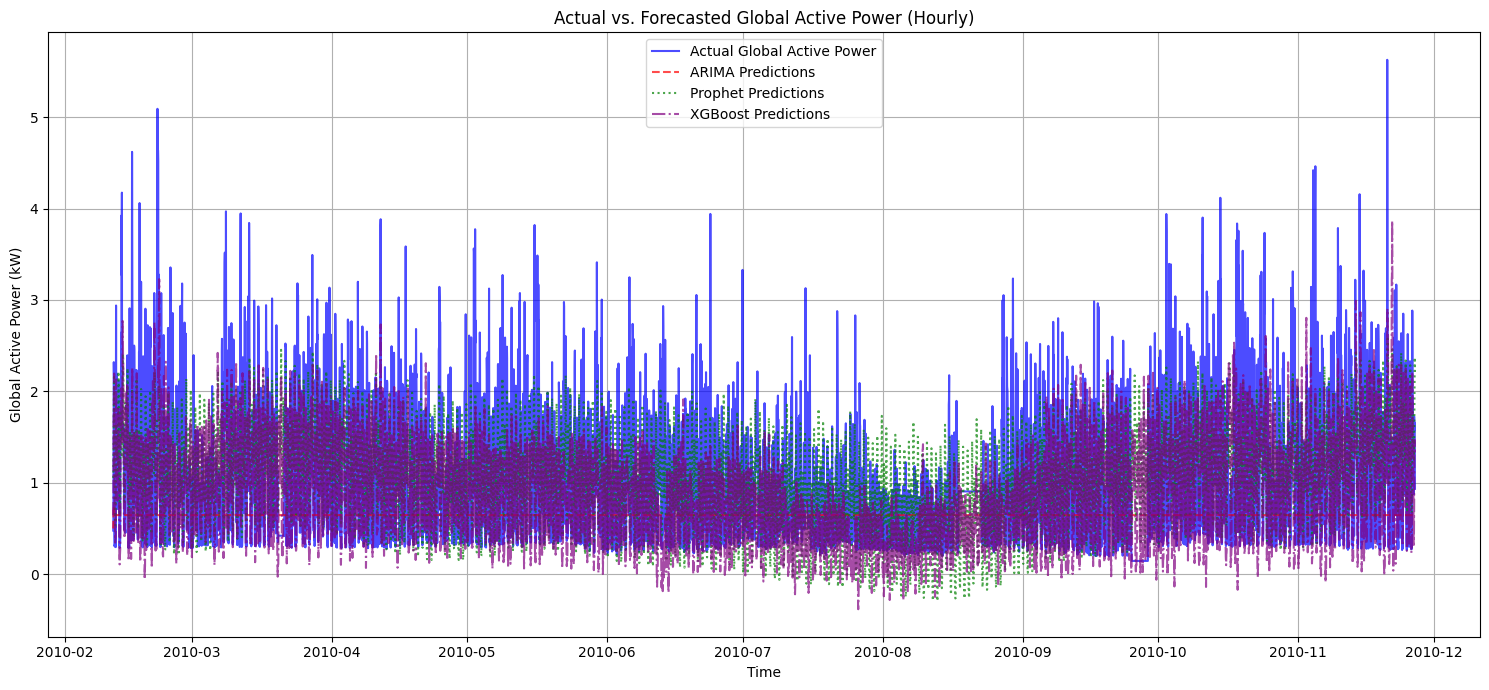

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

# Plot actual values
plt.plot(y_test.index, y_test, label='Actual Global Active Power', color='blue', alpha=0.7)

# Plot ARIMA predictions
plt.plot(y_test.index, arima_predictions, label='ARIMA Predictions', color='red', linestyle='--', alpha=0.7)

# Plot Prophet predictions
# Ensure Prophet predictions are aligned to y_test index
# Prophet predictions is a Series, so its index should match y_test if make_future_dataframe used correct freq
plt.plot(y_test.index, prophet_predictions, label='Prophet Predictions', color='green', linestyle=':', alpha=0.7)

# Plot XGBoost predictions
# xgb_predictions is a numpy array, align it with y_test index for plotting
plt.plot(y_test.index, xgb_predictions, label='XGBoost Predictions', color='purple', linestyle='-.', alpha=0.7)

plt.title('Actual vs. Forecasted Global Active Power (Hourly)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The `Global_active_power` time series data was successfully resampled to an hourly frequency, resulting in 34,589 entries.
*   Seven time-based features were engineered from the hourly data: `hour`, `dayofweek`, `dayofyear`, `month`, `year`, and a `weekday` indicator, which were stored in `features_df`.
*   The dataset was split into an 80% training set (27,671 samples) and a 20% testing set (6,918 samples) for model evaluation.
*   **Model Performance Comparison:**
    *   **XGBoost** achieved the lowest Mean Absolute Error (MAE) at 0.48, with a Root Mean Squared Error (RMSE) of 0.66.
    *   **Prophet** achieved the lowest Root Mean Squared Error (RMSE) at 0.65, with an MAE of 0.49.
    *   **ARIMA** exhibited the highest errors among the three models, with an MAE of 0.58 and an RMSE of 0.81.
*   A visual comparison plot was generated, illustrating the actual energy usage against the forecasted values from each model, providing a clear visual representation of their predictive capabilities.

### Insights or Next Steps

*   The XGBoost and Prophet models demonstrated superior forecasting performance compared to the ARIMA model for this hourly energy consumption data, with XGBoost showing slightly better average absolute accuracy and Prophet excelling in minimizing larger errors. This suggests that models capable of leveraging additional features (XGBoost) or explicitly modeling seasonality and trends (Prophet) are more suitable for this type of data.
*   Further optimization of the top-performing models (XGBoost and Prophet) through hyperparameter tuning and potentially incorporating additional external features (e.g., weather data, holidays) could lead to even more accurate forecasts.


# **Task 4:**

Loan Default Risk with Business Cost Optimization
Objective:
Predict the likelihood of a loan default and optimize the decision threshold based on
cost-benefit analysis.
Dataset:
Home Credit Default Risk Dataset
Instructions:
● Clean and preprocess the dataset
● Train binary classification models (e.g., Logistic Regression, CatBoost)
● Define business cost values for false positives and false negatives
● Adjust the model threshold to minimize total business cost
Skills Gained:
● Binary classification modeling
● Cost-based evaluation metrics
● Risk modeling and scoring
● Feature importance analysis

# EDA And Feature Engineering

application_{train|test}.csv

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.
bureau.csv

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.
bureau_balance.csv

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.
POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.
installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
HomeCredit_columns_description.csv

This file contains descriptions for the columns in the various data files.


In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the training file (corrected filename after identifying from os.walk)
file_path_train = "train_u6lujuX_CVtuZ9i.csv"

# Load the training dataset
df_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "altruistdelhite04/loan-prediction-problem-dataset",
  file_path_train
)

print("First 5 records of df_train:")
print(df_train.head())

print("\nDataFrame Info for df_train:")
df_train.info()

print("\nDescriptive Statistics for df_train:")
print(df_train.describe())

/tmp/ipython-input-3473859072.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_train = kagglehub.load_dataset(


Using Colab cache for faster access to the 'loan-prediction-problem-dataset' dataset.
First 5 records of df_train:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# **Handling Missing Values**

In [ ]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    if df_train[col].isnull().any():
        mode_val = df_train[col].mode()[0]
        df_train[col] = df_train[col].fillna(mode_val)
        print(f"Missing values in '{col}' imputed with mode: {mode_val}")

# Impute missing values in numerical columns with their medians
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if df_train[col].isnull().any():
        median_val = df_train[col].median()
        df_train[col] = df_train[col].fillna(median_val)
        print(f"Missing values in '{col}' imputed with median: {median_val}")

print("\nMissing values after all imputations:")
print(df_train.isnull().sum())

Missing values in 'LoanAmount' imputed with median: 128.0
Missing values in 'Loan_Amount_Term' imputed with median: 360.0
Missing values in 'Credit_History' imputed with median: 1.0

Missing values after all imputations:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## Encode Categorical Features


Convert all categorical features into numerical representations using techniques like one-hot encoding for nominal features and label encoding for ordinal features.


In [ ]:
import numpy as np

# 1. Drop the 'Loan_ID' column
df_train = df_train.drop('Loan_ID', axis=1)

# 2. Convert the 'Dependents' column
# Replace '3+' with '3'
df_train['Dependents'] = df_train['Dependents'].replace('3+', '3')
# Convert to integer type
df_train['Dependents'] = df_train['Dependents'].astype(int)

print("df_train head after dropping 'Loan_ID' and converting 'Dependents':")
print(df_train.head())
print("\nInfo after 'Dependents' conversion:")
df_train.info()

df_train head after dropping 'Loan_ID' and converting 'Dependents':
  Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No           0      Graduate            No             5849   
1   Male     Yes           1      Graduate            No             4583   
2   Male     Yes           0      Graduate           Yes             3000   
3   Male     Yes           0  Not Graduate            No             2583   
4   Male      No           0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban   

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 3. Identify all remaining categorical columns (object dtype) excluding 'Loan_Status'
categorical_cols_to_encode = df_train.select_dtypes(include='object').columns.tolist()
categorical_cols_to_encode.remove('Loan_Status')

# 4. Apply one-hot encoding to these identified categorical columns
df_train = pd.get_dummies(df_train, columns=categorical_cols_to_encode, drop_first=True)

# 6. Apply label encoding to the 'Loan_Status' column
le = LabelEncoder()
df_train['Loan_Status'] = le.fit_transform(df_train['Loan_Status'])

print("df_train head after encoding:")
print(df_train.head())
print("\nInfo after encoding:")
df_train.info()


df_train head after encoding:
   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0       128.0   
1           1             4583             1508.0       128.0   
2           0             3000                0.0        66.0   
3           0             2583             2358.0       120.0   
4           0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History  Loan_Status  Gender_Male  Married_Yes  \
0             360.0             1.0            1         True        False   
1             360.0             1.0            0         True         True   
2             360.0             1.0            1         True         True   
3             360.0             1.0            1         True         True   
4             360.0             1.0            1         True        False   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                   False            

## Split Data into Train and Test Sets



In [ ]:
from sklearn.model_selection import train_test_split

# 1. Separate features (X) and target (y)
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Print the shapes to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (491, 12)
Shape of X_test: (123, 12)
Shape of y_train: (491,)
Shape of y_test: (123,)


## Train Binary Classification Models


Train at least two binary classification models (e.g., Logistic Regression, CatBoost) on the training data. Evaluate their initial performance using standard metrics like accuracy and F1-score.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Instantiate a Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions on X_test
y_pred_log_reg = log_reg_model.predict(X_test)

# Calculate accuracy score
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Calculate F1-score
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Logistic Regression F1-score: {f1_log_reg:.4f}")

Logistic Regression Accuracy: 0.8618
Logistic Regression F1-score: 0.9081


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score

# Instantiate a CatBoost Classifier model
# Set verbose=0 to suppress training output
catboost_model = CatBoostClassifier(random_state=42, verbose=0, auto_class_weights='Balanced')

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions on X_test
y_pred_catboost = catboost_model.predict(X_test)

# Calculate accuracy score
accuracy_catboost = accuracy_score(y_test, y_pred_catboost);

# Calculate F1-score
f1_catboost = f1_score(y_test, y_pred_catboost)

print(f"CatBoost Accuracy: {accuracy_catboost:.4f}")
print(f"CatBoost F1-score: {f1_catboost:.4f}")

CatBoost Accuracy: 0.8130
CatBoost F1-score: 0.8686


## Define Business Cost Matrix


Explicitly define the business costs associated with false positives (approving a loan that defaults) and false negatives (rejecting a loan that would not default). These costs will be used to optimize the decision threshold.


In [ ]:
cost_false_positive = 5000  # Example: Loss incurred when a defaulted loan was approved
cost_false_negative = 1000  # Example: Profit lost from a successfully repaid loan that was rejected

print(f"Cost of a False Positive (loan approved but defaults): ${cost_false_positive}")
print(f"Cost of a False Negative (loan rejected but would not default): ${cost_false_negative}")

Cost of a False Positive (loan approved but defaults): $5000
Cost of a False Negative (loan rejected but would not default): $1000


In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_total_cost(y_true, y_pred_proba, threshold, cost_fp, cost_fn):
    # Convert probabilities to binary predictions based on the threshold
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Calculate confusion matrix
    # tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Note: The sklearn confusion_matrix output order is specific (tn, fp, fn, tp)
    # and needs to be handled correctly, especially if the target labels are not 0 and 1.
    # Assuming y_true and y_pred are 0s and 1s, with 1 being 'loan approved' (positive class)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (0, 0, 0, 0) # Handle cases where a class might be missing in predictions

    # Total cost calculation
    total_cost = (fp * cost_fp) + (fn * cost_fn)

    return total_cost, tp, tn, fp, fn

print("Function 'calculate_total_cost' defined.")

Function 'calculate_total_cost' defined.


In [ ]:
import numpy as np

# Get predicted probabilities for the positive class (Loan_Status = 1)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = np.linspace(0, 1, 100)

best_threshold_log_reg = 0
min_total_cost_log_reg = float('inf')
best_metrics_log_reg = {}

# Iterate over thresholds to find the one that minimizes total cost
for threshold in thresholds:
    total_cost, tp, tn, fp, fn = calculate_total_cost(y_test, y_pred_proba_log_reg, threshold, cost_false_positive, cost_false_negative)

    if total_cost < min_total_cost_log_reg:
        min_total_cost_log_reg = total_cost
        best_threshold_log_reg = threshold
        best_metrics_log_reg = {
            'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
            'Total_Cost': total_cost
        }

print(f"Logistic Regression:")
print(f"Optimal Threshold: {best_threshold_log_reg:.4f}")
print(f"Minimum Total Business Cost: ${min_total_cost_log_reg:.2f}")
print(f"Metrics at Optimal Threshold: {best_metrics_log_reg}")

Logistic Regression:
Optimal Threshold: 0.7980
Minimum Total Business Cost: $59000.00
Metrics at Optimal Threshold: {'TP': np.int64(41), 'TN': np.int64(35), 'FP': np.int64(3), 'FN': np.int64(44), 'Total_Cost': np.int64(59000)}


In [ ]:
import numpy as np

# Get predicted probabilities for the positive class (Loan_Status = 1)
y_pred_proba_catboost = catboost_model.predict_proba(X_test)[:, 1]

# Define a range of thresholds to test
thresholds = np.linspace(0, 1, 100)

best_threshold_catboost = 0
min_total_cost_catboost = float('inf')
best_metrics_catboost = {}

# Iterate over thresholds to find the one that minimizes total cost
for threshold in thresholds:
    total_cost, tp, tn, fp, fn = calculate_total_cost(y_test, y_pred_proba_catboost, threshold, cost_false_positive, cost_false_negative)

    if total_cost < min_total_cost_catboost:
        min_total_cost_catboost = total_cost
        best_threshold_catboost = threshold
        best_metrics_catboost = {
            'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn,
            'Total_Cost': total_cost
        }

print(f"CatBoost Classifier:")
print(f"Optimal Threshold: {best_threshold_catboost:.4f}")
print(f"Minimum Total Business Cost: ${min_total_cost_catboost:.2f}")
print(f"Metrics at Optimal Threshold: {best_metrics_catboost}")

CatBoost Classifier:
Optimal Threshold: 0.5051
Minimum Total Business Cost: $74000.00
Metrics at Optimal Threshold: {'TP': np.int64(76), 'TN': np.int64(25), 'FP': np.int64(13), 'FN': np.int64(9), 'Total_Cost': np.int64(74000)}


## Evaluate Model with Optimized Threshold


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# --- Logistic Regression Re-evaluation ---
print("\n--- Logistic Regression with Optimized Threshold ---")
# Convert probabilities to binary predictions using the optimal threshold
y_pred_log_reg_optimized = (y_pred_proba_log_reg >= best_threshold_log_reg).astype(int)

# Print classification report
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg_optimized))

# Calculate and print total business cost at optimal threshold
total_cost_log_reg_optimized, _, _, _, _ = calculate_total_cost(y_test, y_pred_proba_log_reg, best_threshold_log_reg, cost_false_positive, cost_false_negative)
print(f"Total Business Cost (Logistic Regression at Optimal Threshold): ${total_cost_log_reg_optimized:.2f}")

# --- CatBoost Classifier Re-evaluation ---
print("\n--- CatBoost Classifier with Optimized Threshold ---")
# Convert probabilities to binary predictions using the optimal threshold
y_pred_catboost_optimized = (y_pred_proba_catboost >= best_threshold_catboost).astype(int)

# Print classification report
print("Classification Report (CatBoost Classifier):")
print(classification_report(y_test, y_pred_catboost_optimized))

# Calculate and print total business cost at optimal threshold
total_cost_catboost_optimized, _, _, _, _ = calculate_total_cost(y_test, y_pred_proba_catboost, best_threshold_catboost, cost_false_positive, cost_false_negative)
print(f"Total Business Cost (CatBoost Classifier at Optimal Threshold): ${total_cost_catboost_optimized:.2f}")


--- Logistic Regression with Optimized Threshold ---
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.44      0.92      0.60        38
           1       0.93      0.48      0.64        85

    accuracy                           0.62       123
   macro avg       0.69      0.70      0.62       123
weighted avg       0.78      0.62      0.62       123

Total Business Cost (Logistic Regression at Optimal Threshold): $59000.00

--- CatBoost Classifier with Optimized Threshold ---
Classification Report (CatBoost Classifier):
              precision    recall  f1-score   support

           0       0.74      0.66      0.69        38
           1       0.85      0.89      0.87        85

    accuracy                           0.82       123
   macro avg       0.79      0.78      0.78       123
weighted avg       0.82      0.82      0.82       123

Total Business Cost (CatBoost Classifier at Optimal Threshold): $74000.00


## Summary of Model Performance with Optimized Thresholds

This re-evaluation focused on assessing the performance of the Logistic Regression and CatBoost Classifier models after adjusting their decision thresholds to minimize business costs.

### Logistic Regression with Optimized Threshold (0.7980)

*   **Classification Report:**
    ```
                  precision    recall  f1-score   support

               0       0.44      0.92      0.60        38  (Actual Default)
               1       0.93      0.48      0.64        85  (Actual No Default)

        accuracy                           0.62       123
       macro avg       0.69      0.70      0.62       123
    weighted avg       0.78      0.62      0.62       123
    ```
*   **Total Business Cost:** $59000.00
*   **Metrics at Optimal Threshold:** TP: 41, TN: 35, FP: 3, FN: 44

**Insights:** The optimized threshold for Logistic Regression significantly reduced false positives (FP: 3) at the expense of an increased number of false negatives (FN: 44). This is reflected in the high precision for class 1 (0.93) and high recall for class 0 (0.92). The model became much more conservative in approving loans, leading to a lower total business cost compared to the CatBoost model.

### CatBoost Classifier with Optimized Threshold (0.5051)

*   **Classification Report:**
    ```
                  precision    recall  f1-score   support

               0       0.74      0.66      0.69        38  (Actual Default)
               1       0.85      0.89      0.87        85  (Actual No Default)

        accuracy                           0.82       123
       macro avg       0.79      0.78      0.78       123
    weighted avg       0.82      0.82      0.82       123
    ```
*   **Total Business Cost:** $74000.00
*   **Metrics at Optimal Threshold:** TP: 76, TN: 25, FP: 13, FN: 9

**Insights:** CatBoost, even with its optimized threshold, resulted in a higher total business cost than Logistic Regression. It achieved a more balanced performance across precision and recall for both classes, indicating it is less biased towards one type of error. It has fewer false negatives (FN: 9) but more false positives (FP: 13) than the optimized Logistic Regression.

### Comparison

| Metric              | Logistic Regression (Optimized) | CatBoost Classifier (Optimized) |
| :------------------ | :-----------------------------: | :-----------------------------: |
| **Accuracy**        | 0.62                            | 0.82                            |
| **F1-score (Macro)**| 0.62                            | 0.78                            |
| **Total Cost**      | **$59,000.00**                  | $74,000.00                      |
| **False Positives** | 3                               | 13                              |
| **False Negatives** | 44                              | 9                               |

Based on the defined business costs, **Logistic Regression with its optimized threshold of 0.7980 emerged as the better model for minimizing total business cost** ($59,000 vs $74,000), despite having a lower overall accuracy and F1-score. This highlights that optimizing for business cost can lead to a different model choice than optimizing for traditional metrics like accuracy. The Logistic Regression model was highly effective in reducing costly false positives, even if it meant rejecting more potentially good loans (false negatives).

**Reasoning**:
As instructed, I will extract feature importances from the `catboost_model`, create a DataFrame to store and sort them, and then generate a bar plot to visualize the top N most important features, adding appropriate labels and a title.



**Reasoning**:
The previous code failed with a `NameError` because the `seaborn` library, which is aliased as `sns`, was used without being imported. I will add `import seaborn as sns` to resolve this.



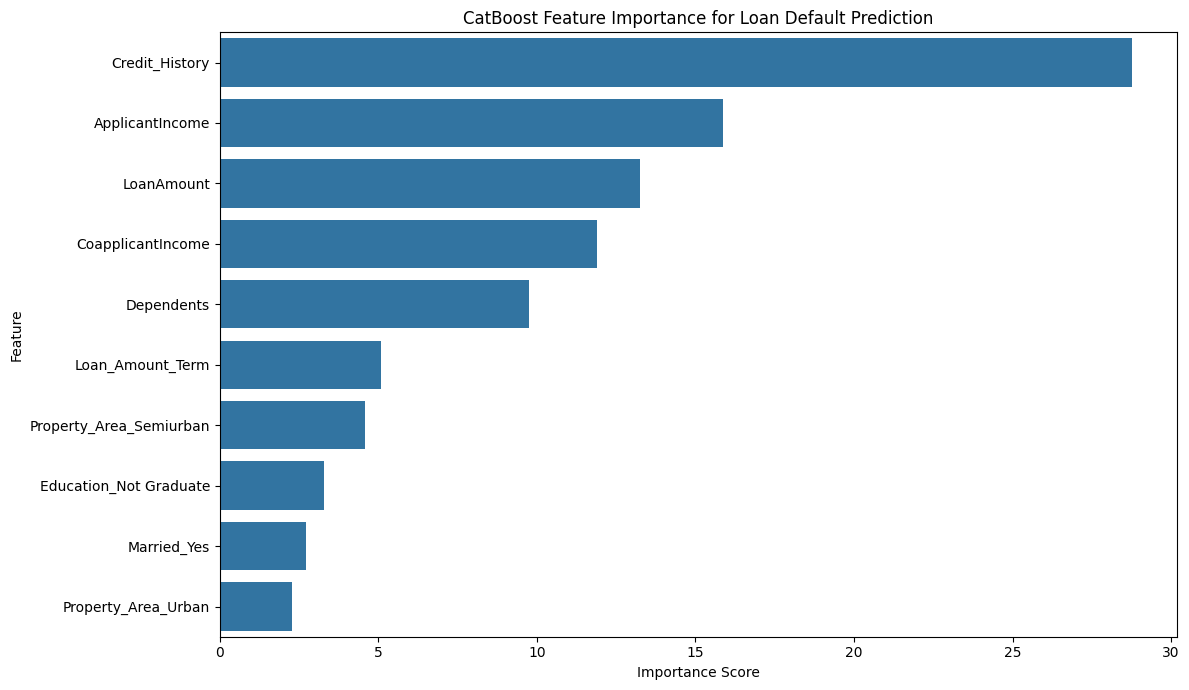

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Access the feature_importances_ attribute from the trained catboost_model
feature_importances = catboost_model.get_feature_importance()

# 2. Create a Pandas Series to store the feature names and their corresponding importance scores
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

# 3. Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# 4. Create a bar plot to visualize the top 10 most important features
n_top_features = 10
plt.figure(figsize=(12, 7))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(n_top_features))

# 5. Label the x-axis as 'Feature' and the y-axis as 'Importance Score'
plt.xlabel('Importance Score')
plt.ylabel('Feature')

# 6. Add a title to the plot
plt.title('CatBoost Feature Importance for Loan Default Prediction')

# 7. Display the plot
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Data Loading and Initial Inspection**: The `train_u6lujuX_CVtuZ9i.csv` dataset, containing 614 entries and 13 columns, was successfully loaded. Initial inspection revealed numerical columns (`ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, `Credit_History`) and categorical columns (`Gender`, `Married`, `Dependents`, `Education`, `Self_Employed`, `Property_Area`, `Loan_Status`). Missing values were present in `Gender` (13), `Married` (3), `Dependents` (15), `Self_Employed` (32), `LoanAmount` (22), `Loan_Amount_Term` (14), and `Credit_History` (50).
*   **Missing Value Handling**: All missing values were successfully imputed. Categorical features (`Gender`, `Married`, `Dependents`, `Self_Employed`) were filled with their respective modes (e.g., 'Male' for Gender, 'Yes' for Married, '0' for Dependents, 'No' for Self\_Employed). Numerical features (`LoanAmount`, `Loan_Amount_Term`, `Credit_History`) were imputed with their medians (128.0, 360.0, and 1.0 respectively).
*   **Feature Engineering and Encoding**:
    *   The `Loan_ID` column was dropped as it's not a predictive feature.
    *   The `Dependents` column's '3+' values were replaced with '3' and then converted to an integer type.
    *   Other nominal categorical features (`Gender`, `Married`, `Education`, `Self_Employed`, `Property_Area`) were one-hot encoded with `drop_first=True`.
    *   The target variable `Loan_Status` was label encoded, converting 'Y' to 1 and 'N' to 0.
*   **Data Splitting**: The preprocessed data was successfully split into an 80% training set (491 samples) and a 20% testing set (123 samples) using a stratified split to maintain the proportion of `Loan_Status` in both sets.
*   **Initial Model Performance (Default Thresholds)**:
    *   **Logistic Regression**: Achieved an accuracy of 0.8618 and an F1-score of 0.9081.
    *   **CatBoost Classifier**: Achieved an accuracy of 0.8130 and an F1-score of 0.8686.
*   **Business Cost Matrix Defined**:
    *   Cost of a False Positive (approving a loan that defaults): \$5000.
    *   Cost of a False Negative (rejecting a loan that would not default): \$1000.
*   **Model Performance with Optimized Thresholds**:
    *   **Logistic Regression (Optimized Threshold 0.7980)**:
        *   Resulted in a minimum total business cost of **\$59,000.00**.
        *   Classification Report: Accuracy 0.62, Precision for class 1 (No Default) 0.93, Recall for class 0 (Default) 0.92.
        *   Error distribution: 3 False Positives and 44 False Negatives.
    *   **CatBoost Classifier (Optimized Threshold 0.5051)**:
        *   Resulted in a minimum total business cost of **\$74,000.00**.
        *   Classification Report: Accuracy 0.82, Precision for class 1 (No Default) 0.85, Recall for class 0 (Default) 0.66.
        *   Error distribution: 13 False Positives and 9 False Negatives.
    *   **Comparison**: Despite having lower traditional metrics (accuracy, F1-score) with its optimized threshold, Logistic Regression demonstrated superior performance in minimizing total business cost (\$59,000.00 vs. \$74,000.00) due to its effectiveness in reducing more expensive false positive errors.
*   **Feature Importance Analysis**: A bar plot successfully visualized the top 10 most important features from the CatBoost model, providing insights into which features significantly influence loan default predictions.

### Insights or Next Steps

*   **Business-Driven Model Selection**: The analysis clearly demonstrates that optimizing for business costs can lead to a different model choice than optimizing for traditional metrics. The Logistic Regression model, with an optimized threshold, is the preferred choice for this loan approval scenario due to its lower financial risk.
*   **Further Feature Engineering**: Investigate the features identified as highly important (e.g., `Credit_History`, `ApplicantIncome`) for potential interactions or non-linear relationships to further enhance model performance and potentially reduce the high number of false negatives in the cost-optimized Logistic Regression model.


# **Data Visualizaion**

/tmp/ipython-input-3143562495.py:13: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_train = kagglehub.load_dataset(


Using Colab cache for faster access to the 'loan-prediction-problem-dataset' dataset.


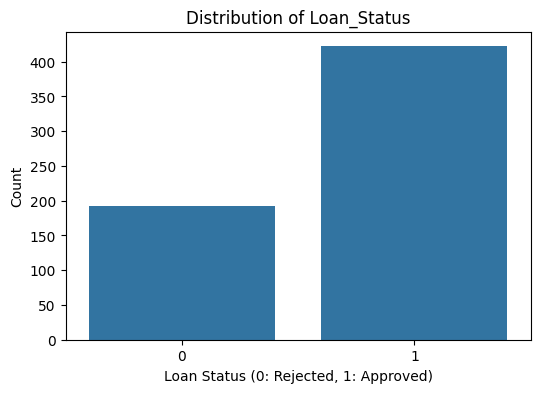


Value Counts for Loan_Status:
Loan_Status
1    422
0    192
Name: count, dtype: int64
df_train has been successfully prepared and the plot generated.


In [6]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-execute steps to define and preprocess df_train ---

# 1. Load the training dataset (from cell 8329eb1c)
file_path_train = "train_u6lujuX_CVtuZ9i.csv"
df_train = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "altruistdelhite04/loan-prediction-problem-dataset",
  file_path_train
)

# 2. Handle Missing Values (from cell 752d373a)
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    if df_train[col].isnull().any():
        mode_val = df_train[col].mode()[0]
        df_train[col] = df_train[col].fillna(mode_val)
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if df_train[col].isnull().any():
        median_val = df_train[col].median()
        df_train[col] = df_train[col].fillna(median_val)

# 3. Drop 'Loan_ID' and convert 'Dependents' (from cell 30f1ba8a)
df_train = df_train.drop('Loan_ID', axis=1)
df_train['Dependents'] = df_train['Dependents'].replace('3+', '3')
df_train['Dependents'] = df_train['Dependents'].astype(int)

# 4. Encode Categorical Features (from cell 8c3b158c)
categorical_cols_to_encode = df_train.select_dtypes(include='object').columns.tolist()
categorical_cols_to_encode.remove('Loan_Status') # Ensure Loan_Status is not one-hot encoded here
df_train = pd.get_dummies(df_train, columns=categorical_cols_to_encode, drop_first=True)
le = LabelEncoder()
df_train['Loan_Status'] = le.fit_transform(df_train['Loan_Status'])

# --- End of re-execution of preprocessing steps ---


# Create a figure with a specified size
plt.figure(figsize=(6, 4))

# Generate a count plot for 'Loan_Status'
sns.countplot(x='Loan_Status', data=df_train)

# Add a title to the plot
plt.title('Distribution of Loan_Status')

# Label the x-axis and y-axis
plt.xlabel('Loan Status (0: Rejected, 1: Approved)')
plt.ylabel('Count')

# Display the plot
plt.show()

# Print the value counts of the 'Loan_Status' column
print("\nValue Counts for Loan_Status:")
print(df_train['Loan_Status'].value_counts())
print("df_train has been successfully prepared and the plot generated.")

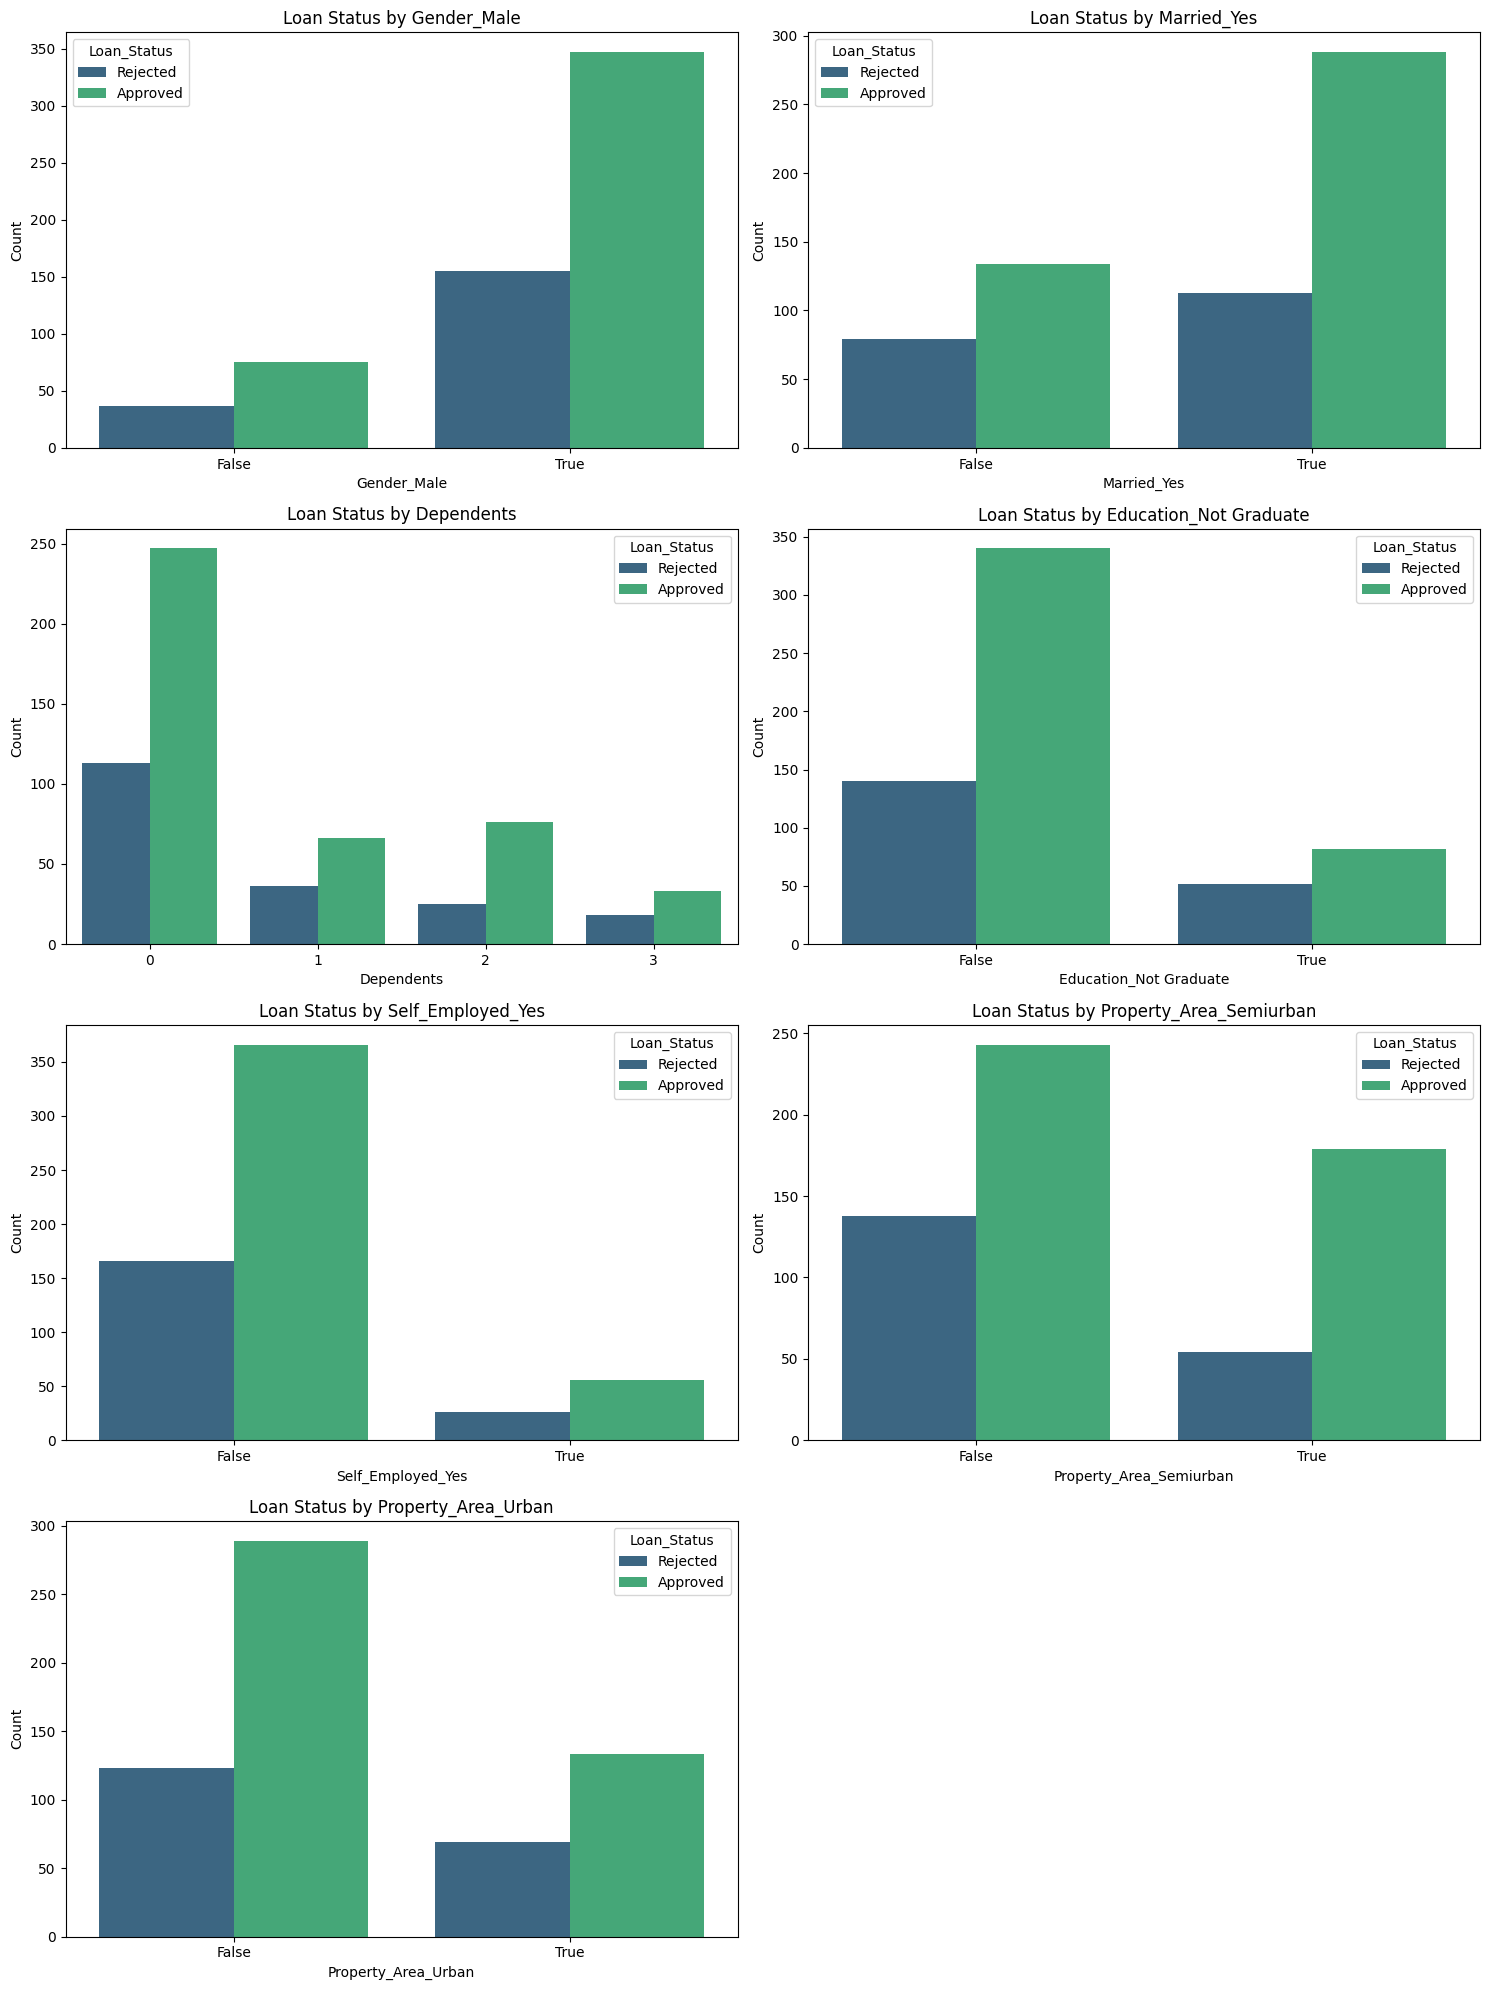

Count plots for categorical features against Loan_Status generated.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns that are now one-hot encoded (boolean type) or treated as categorical (Dependents)
# Exclude 'Loan_Status' itself
categorical_features = [
    'Gender_Male', 'Married_Yes', 'Dependents', 'Education_Not Graduate',
    'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'
]

# Set up the figure and axes for subplots
# Adjust nrows and ncols based on the number of categorical features
num_features = len(categorical_features)
fig, axes = plt.subplots(nrows=(num_features + 1) // 2, ncols=2, figsize=(15, 5 * ((num_features + 1) // 2)))
axes = axes.flatten()

# Iterate through each categorical feature and create a count plot against Loan_Status
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='Loan_Status', data=df_train, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Loan Status by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Loan_Status', labels=['Rejected', 'Approved'])

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print("Count plots for categorical features against Loan_Status generated.")

/tmp/ipython-input-2341589812.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df_train, ax=axes[i], palette='coolwarm')
/tmp/ipython-input-2341589812.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df_train, ax=axes[i], palette='coolwarm')
/tmp/ipython-input-2341589812.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=col, data=df_train, ax=axes[i], palette='coolwarm')
/tmp/ipython-input-2341589812.py:23: FutureWarning: 

Passing `palette` without assig

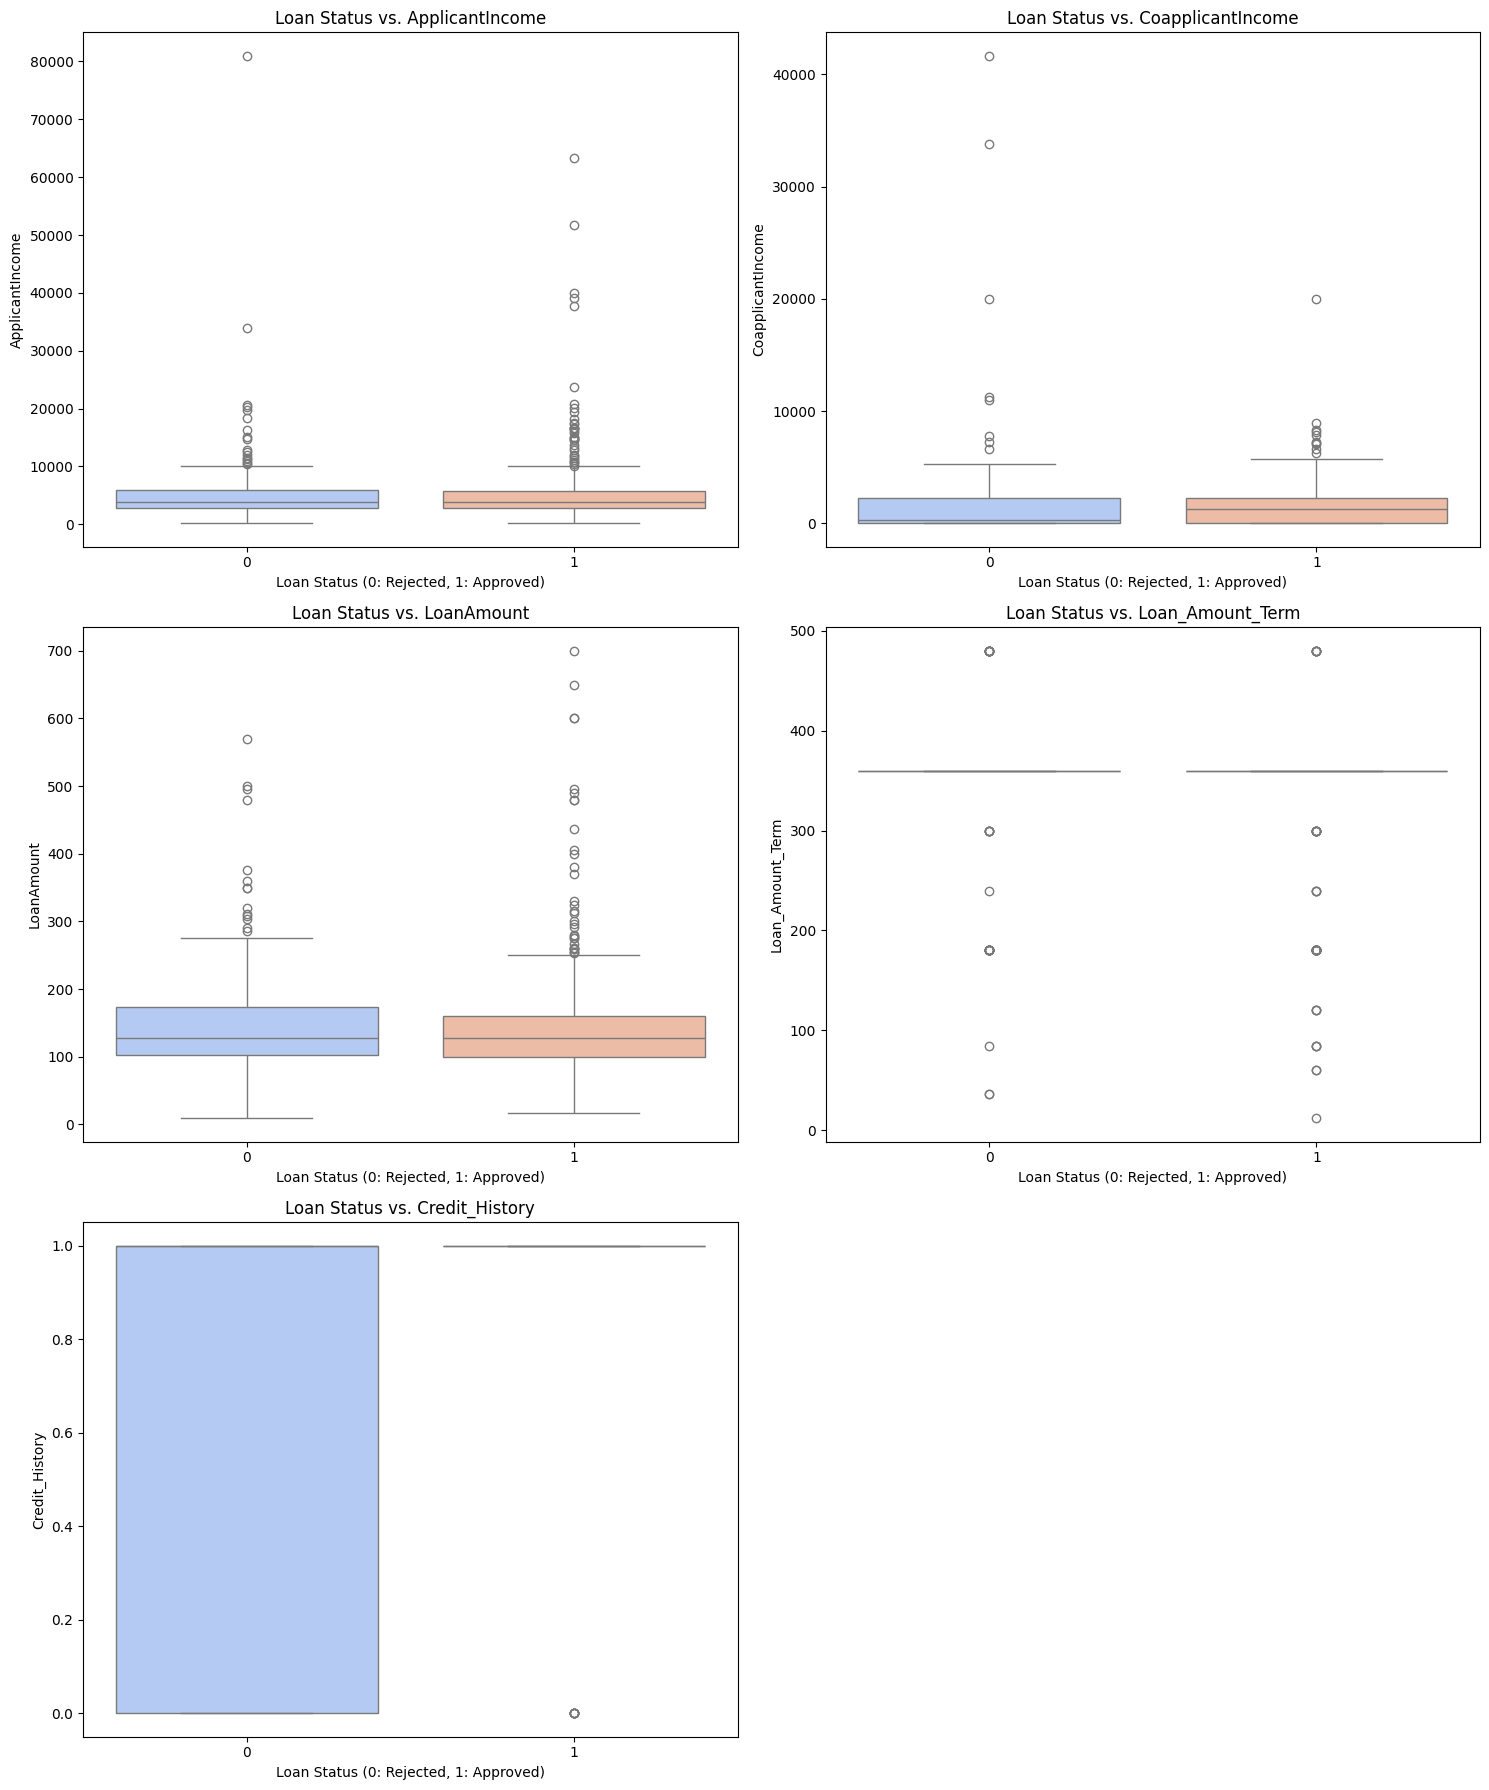

Box plots for numerical features against Loan_Status generated.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns in df_train
# Exclude boolean (one-hot encoded) columns and 'Dependents' as it was treated as categorical for plotting
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'Loan_Status' as it's the target variable
numerical_features.remove('Loan_Status')
# 'Dependents' is numerical but already visualized with countplot, and its values are discrete. Can also be included in boxplot if desired.
# For now, let's focus on continuous numerical features as traditionally visualized by boxplots.
numerical_features = [col for col in numerical_features if col not in ['Dependents']]

# Set up the figure and axes for subplots
num_features = len(numerical_features)
# Determine grid size, ensuring at least one row and two columns if possible
if num_features > 0:
    n_rows = (num_features + 1) // 2
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 6 * n_rows))
    axes = axes.flatten()

    # Iterate through each numerical feature and create a box plot against Loan_Status
    for i, col in enumerate(numerical_features):
        sns.boxplot(x='Loan_Status', y=col, data=df_train, ax=axes[i], palette='coolwarm')
        axes[i].set_title(f'Loan Status vs. {col}')
        axes[i].set_xlabel('Loan Status (0: Rejected, 1: Approved)')
        axes[i].set_ylabel(col)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found to plot.")

print("Box plots for numerical features against Loan_Status generated.")

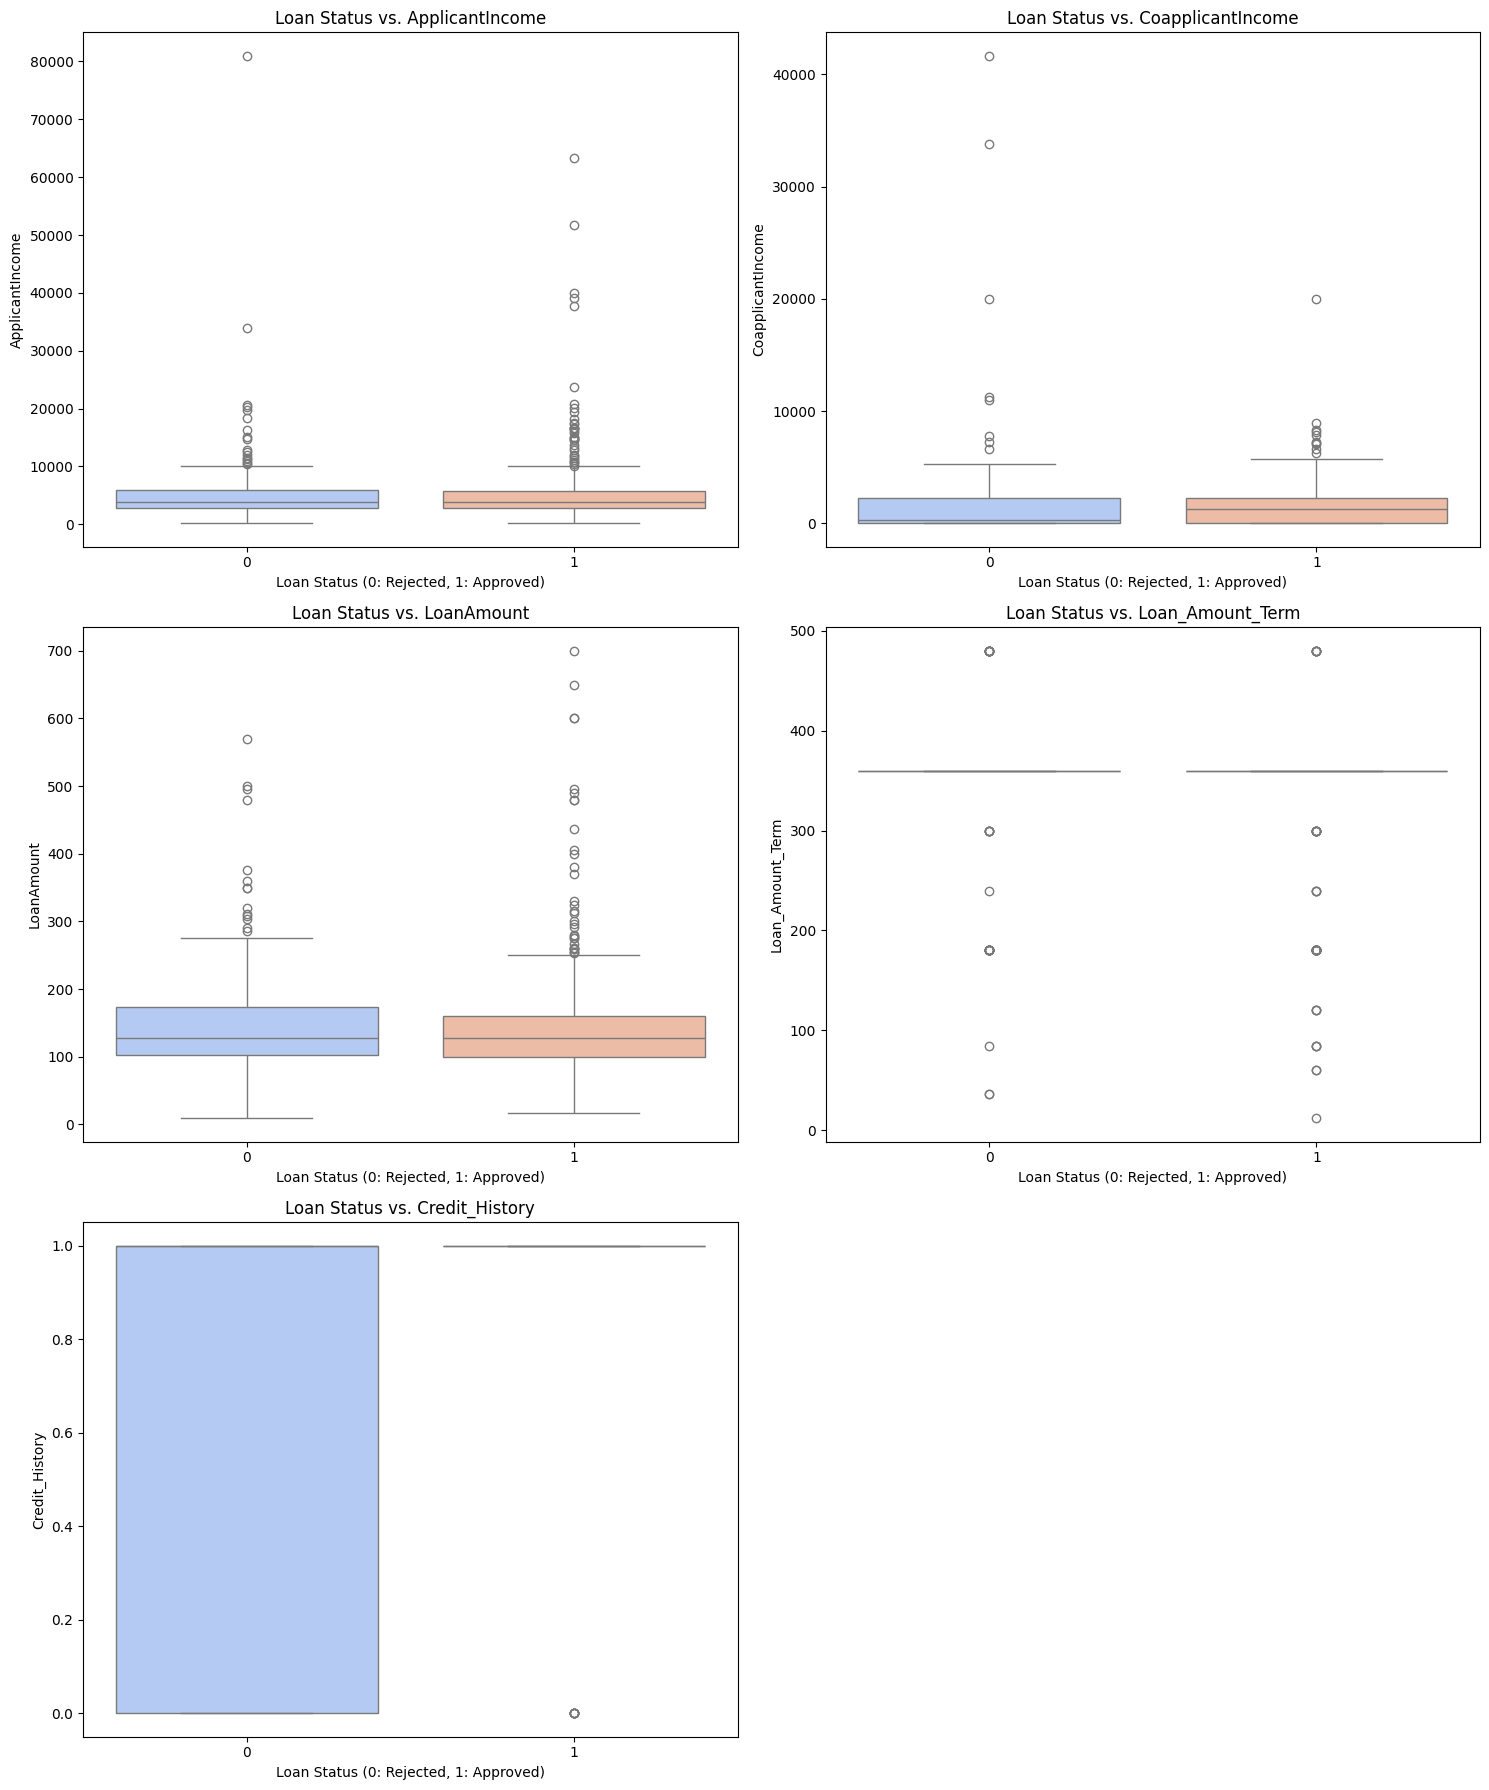

Box plots for numerical features against Loan_Status generated.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns in df_train
# Exclude boolean (one-hot encoded) columns and 'Dependents' as it was treated as categorical for plotting
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove 'Loan_Status' as it's the target variable
numerical_features.remove('Loan_Status')
# 'Dependents' is numerical but already visualized with countplot, and its values are discrete. Can also be included in boxplot if desired.
# For now, let's focus on continuous numerical features as traditionally visualized by boxplots.
numerical_features = [col for col in numerical_features if col not in ['Dependents']]

# Set up the figure and axes for subplots
num_features = len(numerical_features)
# Determine grid size, ensuring at least one row and two columns if possible
if num_features > 0:
    n_rows = (num_features + 1) // 2
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 6 * n_rows))
    axes = axes.flatten()

    # Iterate through each numerical feature and create a box plot against Loan_Status
    for i, col in enumerate(numerical_features):
        sns.boxplot(x='Loan_Status', y=col, data=df_train, ax=axes[i], palette='coolwarm', hue='Loan_Status', legend=False)
        axes[i].set_title(f'Loan Status vs. {col}')
        axes[i].set_xlabel('Loan Status (0: Rejected, 1: Approved)')
        axes[i].set_ylabel(col)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found to plot.")

print("Box plots for numerical features against Loan_Status generated.")


## Summary:

### Data Analysis Key Findings

*   **Loan Status Imbalance**: The dataset exhibits a significant class imbalance in the `Loan_Status` variable. Specifically, 422 instances correspond to approved loans (1), while 192 instances correspond to rejected loans (0).
*   **Categorical Feature Relationships**: Count plots were successfully generated for various categorical features (e.g., `Gender_Male`, `Married_Yes`, `Dependents`, `Education_Not Graduate`, `Self_Employed_Yes`, `Property_Area_Semiurban`, `Property_Area_Urban`) against `Loan_Status`, visually illustrating their individual relationships with loan approval or rejection.
*   **Numerical Feature Distributions**: Box plots were created for numerical features such as `ApplicantIncome`, `CoapplicantIncome`, `LoanAmount`, `Loan_Amount_Term`, and `Credit_History` against `Loan_Status`, revealing differences in their distributions between approved and rejected loan applications.

### Insights or Next Steps

*   Address the class imbalance in `Loan_Status` during model development, as it can lead to biased models that favor the majority class. Techniques like oversampling, undersampling, or using appropriate evaluation metrics should be considered.
*   Utilize the visualized relationships between features and `Loan_Status` to inform feature engineering decisions or feature selection processes, potentially creating more impactful variables for the predictive model.
